In [1]:
# Load modules
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd # conda install --channel conda-forge geopandas
import numpy as np, pandas as pd, geopandas as gpd
import matplotlib.pyplot as plt
import shapely.vectorized

In [2]:
# Load .NC Dataset CHIRPS-2.0 Global Monthly NETCDF
x = np.arange(-74.8, -71.9, 0.05)
y = np.arange(4.5, 7.3, 0.05)
xx, yy = np.meshgrid(x, y)
xnorm = (xx - xx.min()) / (xx.max() - xx.min())
ynorm = (yy - yy.min()) / (yy.max() - yy.min())

# load chirps precipitation data
chirps = xr.open_dataset('/media/engricardoperez/Archivos/chirps-v2.0.monthly.nc')

# select precipitation variable
pr = chirps['precip']

# select boundaries (xmin, xmax, ymin and ymax) and time period of interest
pr_boyaca = pr.sel(longitude=slice(-74.8,-71.9), latitude=slice(4.5,7.3),time=slice('2020-01-01','2020-01-01')) #time=slice('1981','2020'))
v = pr_boyaca.to_numpy()

In [3]:
# convert xarray to geopandas
df = pr_boyaca.to_dataframe().reset_index()
gdf_precip = gpd.GeoDataFrame(df.precip, geometry=gpd.points_from_xy(df.longitude,df.latitude))
gdf_boyaca = gpd.read_file('/media/engricardoperez/Archivos/depto/boyaca.shp')#, crs="epsg:4326")

In [4]:
v = np.squeeze(v) #np 3-D to 2-D

(4.475, 7.27499999999999)

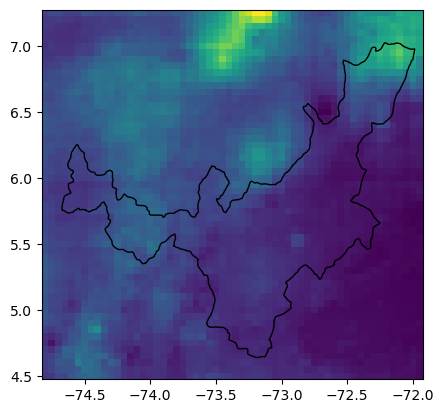

In [5]:
fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, v)
xlim, ylim = ax.get_xlim(), ax.get_ylim()
gdf_boyaca.plot(ax=ax, color='none', edgecolor='k')
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)

(4.475, 7.27499999999999)

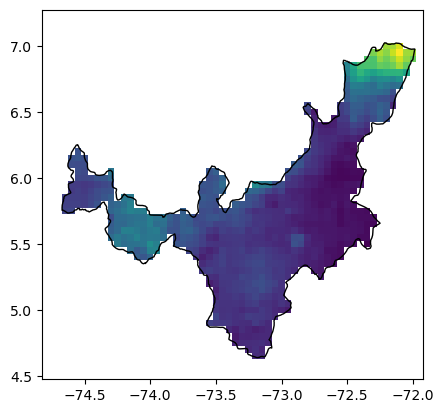

In [6]:
mask = shapely.vectorized.contains(gdf_boyaca.dissolve().geometry.item(), xx, yy)

fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, np.where(mask, v, np.nan))
xlim, ylim = ax.get_xlim(), ax.get_ylim()
gdf_boyaca.plot(ax=ax, color='none', edgecolor='k')
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)